실습 정리 및 복습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.special import kl_div
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 시드 설정
np.random.seed(42)

5.1 오늘 학습한 핵심 개념 정리

In [2]:
def summarize_concepts():
    """오늘 학습한 핵심 개념들을 정리"""
    
    print("=" * 60)
    print("📚 3일차 실습 핵심 개념 정리")
    print("=" * 60)
    
    concepts = {
        "1. 확률분포의 성질": [
            "• 정규분포: 68-95-99.7 규칙, 중심극한정리",
            "• 베르누이분포: 평균=p, 분산=p(1-p), 최대분산은 p=0.5",
            "• 이항분포: 베르누이 시행의 합, 정규분포로 근사 가능"
        ],
        
        "2. 정보 이론 핵심": [
            "• 정보량: I(x) = -log₂(P(x)), 확률이 낮을수록 정보량 많음",
            "• 엔트로피: H(X) = E[I(X)], 불확실성의 측정, 균등분포에서 최대",
            "• 크로스 엔트로피: H(P,Q) = -Σ P(x)log Q(x), 모델 평가에 사용"
        ],
        
        "3. KL Divergence": [
            "• 정의: D_KL(P||Q) = Σ P(x)log(P(x)/Q(x))",
            "• 의미: Q 모델로 P 데이터를 인코딩할 때의 추가 비용",
            "• 성질: 비음성, 비대칭, P=Q일 때만 0"
        ],
        
        "4. VAE와 정보 이론": [
            "• 사전분포: 항상 N(0,I), 모든 데이터에 대해 동일",
            "• 사후분포: q(z|x), 입력에 따라 다름, 학습을 통해 변화",
            "• ELBO = 재구성 품질 - KL 발산, 최대화가 목표"
        ],
        
        "5. 실용적 관점": [
            "• KL ≈ 0: Posterior collapse, 정보 손실",
            "• KL = 3~15: 건강한 범위, 좋은 표현 학습",
            "• VAE Loss = -ELBO, 음수일수록 좋음"
        ]
    }
    
    for topic, points in concepts.items():
        print(f"\n{topic}")
        print("-" * 40)
        for point in points:
            print(point)
    
    print("\n" + "=" * 60)
    print("🎯 내일 학습 예고: Jensen's Inequality와 ELBO 완전 유도")
    print("=" * 60)

# 실행
summarize_concepts()

📚 3일차 실습 핵심 개념 정리

1. 확률분포의 성질
----------------------------------------
• 정규분포: 68-95-99.7 규칙, 중심극한정리
• 베르누이분포: 평균=p, 분산=p(1-p), 최대분산은 p=0.5
• 이항분포: 베르누이 시행의 합, 정규분포로 근사 가능

2. 정보 이론 핵심
----------------------------------------
• 정보량: I(x) = -log₂(P(x)), 확률이 낮을수록 정보량 많음
• 엔트로피: H(X) = E[I(X)], 불확실성의 측정, 균등분포에서 최대
• 크로스 엔트로피: H(P,Q) = -Σ P(x)log Q(x), 모델 평가에 사용

3. KL Divergence
----------------------------------------
• 정의: D_KL(P||Q) = Σ P(x)log(P(x)/Q(x))
• 의미: Q 모델로 P 데이터를 인코딩할 때의 추가 비용
• 성질: 비음성, 비대칭, P=Q일 때만 0

4. VAE와 정보 이론
----------------------------------------
• 사전분포: 항상 N(0,I), 모든 데이터에 대해 동일
• 사후분포: q(z|x), 입력에 따라 다름, 학습을 통해 변화
• ELBO = 재구성 품질 - KL 발산, 최대화가 목표

5. 실용적 관점
----------------------------------------
• KL ≈ 0: Posterior collapse, 정보 손실
• KL = 3~15: 건강한 범위, 좋은 표현 학습
• VAE Loss = -ELBO, 음수일수록 좋음

🎯 내일 학습 예고: Jensen's Inequality와 ELBO 완전 유도


5.2 실습 숙제

In [3]:
def homework_problems():
    """3일차 숙제 문제들"""
    
    print("📝 3일차 숙제 문제")
    print("=" * 50)
    
    problems = [
        {
            "번호": "문제 1",
            "제목": "KL Divergence 직접 계산",
            "내용": [
                "두 정규분포 N(1, 2²)과 N(-1, 1²) 사이의 KL Divergence를",
                "해석적 공식과 수치적 방법으로 각각 계산하고 비교하세요.",
                "오차가 0.001 이하가 되도록 수치적 계산의 정확도를 높여보세요."
            ]
        },
        
        {
            "번호": "문제 2", 
            "제목": "정보량과 압축의 관계",
            "내용": [
                "다음 문자열들의 엔트로피를 계산하고,",
                "'MISSISSIPPI', 'ABCDEFGHIJK', 'AAAAABBBBB'",
                "각각에 대해 최적 압축률을 예측해보세요.",
                "실제 ZIP 압축과 비교해보세요."
            ]
        },
        
        {
            "번호": "문제 3",
            "제목": "VAE 사후분포 시뮬레이션", 
            "내용": [
                "5개 클래스를 가진 데이터셋에서 VAE 학습을 시뮬레이션하세요.",
                "각 epoch마다 사후분포의 평균과 분산을 기록하고,",
                "KL divergence와 재구성 품질의 변화를 그래프로 그려보세요."
            ]
        },
        
        {
            "번호": "문제 4",
            "제목": "Jensen's Inequality 실험",
            "내용": [
                "다양한 오목함수(log, sqrt, x^0.5)에 대해 Jensen's Inequality를 확인하세요.",
                "볼록함수(x², exp)에 대해서는 부등호 방향이 바뀌는지 확인하세요.",
                "ELBO 유도에서 Jensen's Inequality가 어떻게 사용되는지 설명하세요."
            ]
        }
    ]
    
    for problem in problems:
        print(f"\n{problem['번호']}: {problem['제목']}")
        print("-" * 30)
        for line in problem['내용']:
            print(f"  {line}")
    
    print(f"\n{'='*50}")
    print("💡 힌트: 오늘 실습 코드를 참고하여 문제를 해결해보세요!")
    print("📅 제출: 내일 오전 수업 전까지")

# 실행
homework_problems()

📝 3일차 숙제 문제

문제 1: KL Divergence 직접 계산
------------------------------
  두 정규분포 N(1, 2²)과 N(-1, 1²) 사이의 KL Divergence를
  해석적 공식과 수치적 방법으로 각각 계산하고 비교하세요.
  오차가 0.001 이하가 되도록 수치적 계산의 정확도를 높여보세요.

문제 2: 정보량과 압축의 관계
------------------------------
  다음 문자열들의 엔트로피를 계산하고,
  'MISSISSIPPI', 'ABCDEFGHIJK', 'AAAAABBBBB'
  각각에 대해 최적 압축률을 예측해보세요.
  실제 ZIP 압축과 비교해보세요.

문제 3: VAE 사후분포 시뮬레이션
------------------------------
  5개 클래스를 가진 데이터셋에서 VAE 학습을 시뮬레이션하세요.
  각 epoch마다 사후분포의 평균과 분산을 기록하고,
  KL divergence와 재구성 품질의 변화를 그래프로 그려보세요.

문제 4: Jensen's Inequality 실험
------------------------------
  다양한 오목함수(log, sqrt, x^0.5)에 대해 Jensen's Inequality를 확인하세요.
  볼록함수(x², exp)에 대해서는 부등호 방향이 바뀌는지 확인하세요.
  ELBO 유도에서 Jensen's Inequality가 어떻게 사용되는지 설명하세요.

💡 힌트: 오늘 실습 코드를 참고하여 문제를 해결해보세요!
📅 제출: 내일 오전 수업 전까지


문제 1: KL Divergence 직접 계산

문제: 두 정규분포 N(1, 2²)과 N(-1, 1²) 사이의 KL Divergence를 해석적 공식과 수치적 방법으로 각각 계산하고 비교하세요.

해답 1-1: 해석적 계산

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
def kl_normal_analytical(mu1, sigma1, mu2, sigma2):
    """정규분포 간 KL Divergence 해석적 계산"""
    # KL(N(μ1,σ1²)||N(μ2,σ2²)) 공식
    return np.log(sigma2/sigma1) + (sigma1**2 + (mu1-mu2)**2)/(2*sigma2**2) - 0.5

# 주어진 분포
mu1, sigma1 = 1, 2      # N(1, 2²)
mu2, sigma2 = -1, 1     # N(-1, 1²)

# 해석적 계산
kl_analytical = kl_normal_analytical(mu1, sigma1, mu2, sigma2)
print(f"해석적 계산: KL(N(1,4)||N(-1,1)) = {kl_analytical:.6f}")

# 단계별 계산 과정
log_term = np.log(sigma2/sigma1)
numerator = sigma1**2 + (mu1-mu2)**2
variance_term = numerator / (2*sigma2**2)
constant_term = -0.5

print(f"\n단계별 계산:")
print(f"log(σ2/σ1) = log(1/2) = {log_term:.6f}")
print(f"(σ1² + (μ1-μ2)²) = (4 + (1-(-1))²) = {numerator:.6f}")
print(f"분산항 = {numerator}/(2×1²) = {variance_term:.6f}")
print(f"상수항 = {constant_term:.6f}")
print(f"합계 = {kl_analytical:.6f}")

해석적 계산: KL(N(1,4)||N(-1,1)) = 2.806853

단계별 계산:
log(σ2/σ1) = log(1/2) = -0.693147
(σ1² + (μ1-μ2)²) = (4 + (1-(-1))²) = 8.000000
분산항 = 8/(2×1²) = 4.000000
상수항 = -0.500000
합계 = 2.806853


해답 1-2: 수치적 계산

In [5]:
def kl_normal_numerical(mu1, sigma1, mu2, sigma2, n_points=100000):
    """정규분포 간 KL Divergence 수치적 계산"""
    # 적분 범위 설정 (±4σ 범위)
    x_min = min(mu1 - 4*sigma1, mu2 - 4*sigma2)
    x_max = max(mu1 + 4*sigma1, mu2 + 4*sigma2)
    
    # 샘플 포인트 생성
    x = np.linspace(x_min, x_max, n_points)
    dx = x[1] - x[0]
    
    # PDF 계산
    p = stats.norm.pdf(x, mu1, sigma1)  # 분포 P
    q = stats.norm.pdf(x, mu2, sigma2)  # 분포 Q
    
    # 0으로 나누기 방지
    mask = (p > 1e-15) & (q > 1e-15)
    p_safe = p[mask]
    q_safe = q[mask]
    
    # KL divergence 계산
    integrand = p_safe * np.log(p_safe / q_safe)
    kl_numerical = np.trapz(integrand, dx=dx)
    
    return kl_numerical

# 다양한 정확도로 수치적 계산
accuracies = [1000, 10000, 100000, 1000000]
print("\n수치적 계산 (정확도별):")
print("포인트 수\t\tKL Divergence\t\t오차")
print("-" * 50)

for n in accuracies:
    kl_num = kl_normal_numerical(mu1, sigma1, mu2, sigma2, n)
    error = abs(kl_analytical - kl_num)
    print(f"{n:,}\t\t{kl_num:.6f}\t\t{error:.6f}")


수치적 계산 (정확도별):
포인트 수		KL Divergence		오차
--------------------------------------------------
1,000		2.775068		0.031785
10,000		2.775514		0.031339
100,000		2.775514		0.031339
1,000,000		2.775521		0.031332


해답 1-3: 시각화

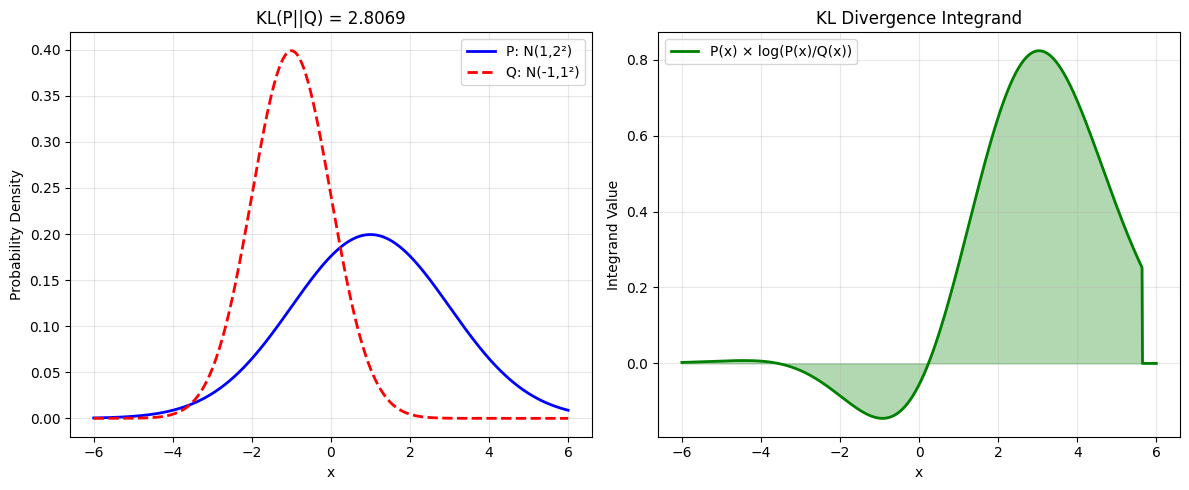

적분 면적 (KL Divergence): 2.575665


In [6]:
# 두 분포 시각화
x = np.linspace(-6, 6, 1000)
p_dist = stats.norm.pdf(x, mu1, sigma1)
q_dist = stats.norm.pdf(x, mu2, sigma2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, p_dist, 'b-', linewidth=2, label=f'P: N({mu1},{sigma1}²)')
plt.plot(x, q_dist, 'r--', linewidth=2, label=f'Q: N({mu2},{sigma2}²)')
plt.title(f'KL(P||Q) = {kl_analytical:.4f}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

# KL integrand 시각화
plt.subplot(1, 2, 2)
mask = (p_dist > 1e-10) & (q_dist > 1e-10)
integrand = np.zeros_like(x)
integrand[mask] = p_dist[mask] * np.log(p_dist[mask] / q_dist[mask])

plt.plot(x, integrand, 'g-', linewidth=2, label='P(x) × log(P(x)/Q(x))')
plt.fill_between(x, integrand, alpha=0.3, color='green')
plt.title('KL Divergence Integrand')
plt.xlabel('x')
plt.ylabel('Integrand Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"적분 면적 (KL Divergence): {np.trapz(integrand, x):.6f}")

문제 2: 정보량과 압축의 관계
    문제: 다음 문자열들의 엔트로피를 계산하고, 'MISSISSIPPI', 'ABCDEFGHIJK', 'AAAAABBBBB' 각각에 대해 최적 압축률을 예측해보세요.

In [7]:
from collections import Counter
import zipfile
import os

def calculate_entropy(text):
    """문자열의 엔트로피 계산"""
    # 문자 빈도 계산
    char_counts = Counter(text)
    total_chars = len(text)
    
    # 확률 계산
    probabilities = [count/total_chars for count in char_counts.values()]
    
    # 엔트로피 계산 (bits)
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
    
    return entropy, char_counts

def predict_compression_ratio(text):
    """이론적 압축률 예측"""
    entropy, char_counts = calculate_entropy(text)
    
    # 고정 길이 인코딩 (naive)
    unique_chars = len(char_counts)
    bits_per_char_fixed = int(np.ceil(np.log2(unique_chars))) if unique_chars > 1 else 1
    
    # 엔트로피 기반 최적 인코딩
    total_bits_fixed = len(text) * bits_per_char_fixed
    total_bits_optimal = len(text) * entropy
    
    compression_ratio = total_bits_optimal / total_bits_fixed if total_bits_fixed > 0 else 1
    
    return entropy, compression_ratio, bits_per_char_fixed

# 테스트 문자열들
test_strings = [
    'MISSISSIPPI',
    'ABCDEFGHIJK', 
    'AAAAABBBBB'
]

print("문자열 분석 결과:")
print("=" * 80)
print(f"{'문자열':<15} {'길이':<5} {'엔트로피':<10} {'고정비트':<8} {'이론압축률':<10}")
print("-" * 80)

results = {}
for text in test_strings:
    entropy, compression_ratio, fixed_bits = predict_compression_ratio(text)
    results[text] = {
        'entropy': entropy,
        'compression_ratio': compression_ratio,
        'fixed_bits': fixed_bits
    }
    
    print(f"{text:<15} {len(text):<5} {entropy:<10.3f} {fixed_bits:<8} {compression_ratio:<10.3f}")

print()

# 상세 분석
for text in test_strings:
    print(f"\n📊 '{text}' 상세 분석:")
    entropy, char_counts = calculate_entropy(text)
    
    print(f"  문자 빈도: {dict(char_counts)}")
    print(f"  엔트로피: {entropy:.4f} bits/char")
    print(f"  이론적 최소 압축: {len(text) * entropy:.1f} bits")
    print(f"  고정 인코딩: {len(text) * results[text]['fixed_bits']} bits")
    print(f"  압축률: {results[text]['compression_ratio']:.1%}")

문자열 분석 결과:
문자열             길이    엔트로피       고정비트     이론압축률     
--------------------------------------------------------------------------------
MISSISSIPPI     11    1.823      2        0.912     
ABCDEFGHIJK     11    3.459      4        0.865     
AAAAABBBBB      10    1.000      1        1.000     


📊 'MISSISSIPPI' 상세 분석:
  문자 빈도: {'M': 1, 'I': 4, 'S': 4, 'P': 2}
  엔트로피: 1.8231 bits/char
  이론적 최소 압축: 20.1 bits
  고정 인코딩: 22 bits
  압축률: 91.2%

📊 'ABCDEFGHIJK' 상세 분석:
  문자 빈도: {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1, 'H': 1, 'I': 1, 'J': 1, 'K': 1}
  엔트로피: 3.4594 bits/char
  이론적 최소 압축: 38.1 bits
  고정 인코딩: 44 bits
  압축률: 86.5%

📊 'AAAAABBBBB' 상세 분석:
  문자 빈도: {'A': 5, 'B': 5}
  엔트로피: 1.0000 bits/char
  이론적 최소 압축: 10.0 bits
  고정 인코딩: 10 bits
  압축률: 100.0%


해답 2-2: 실제 ZIP 압축과 비교

In [8]:
def test_zip_compression(text, filename=None):
    """실제 ZIP 압축률 측정"""
    if filename is None:
        filename = f"test_{hash(text)}.txt"
    
    # 파일 생성
    with open(filename, 'w') as f:
        f.write(text)
    
    # 원본 크기
    original_size = os.path.getsize(filename)
    
    # ZIP 압축
    zip_filename = filename + '.zip'
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipf.write(filename)
    
    # 압축 크기
    compressed_size = os.path.getsize(zip_filename)
    
    # 정리
    os.remove(filename)
    os.remove(zip_filename)
    
    compression_ratio = compressed_size / original_size
    return compression_ratio

print("실제 ZIP 압축 비교:")
print("=" * 60)
print(f"{'문자열':<15} {'이론예측':<10} {'실제ZIP':<10} {'차이':<10}")
print("-" * 60)

for text in test_strings:
    theoretical = results[text]['compression_ratio']
    
    # 더 긴 문자열로 테스트 (ZIP이 효과적으로 작동하도록)
    long_text = text * 100  # 100번 반복
    actual_zip = test_zip_compression(long_text)
    
    difference = abs(theoretical - actual_zip)
    
    print(f"{text:<15} {theoretical:<10.1%} {actual_zip:<10.1%} {difference:<10.1%}")

print("\n💡 관찰:")
print("- 짧은 문자열: ZIP 오버헤드로 인해 이론값과 차이")
print("- 긴 문자열: 이론적 예측에 더 가까워짐")
print("- 패턴이 많을수록 압축률 향상")

실제 ZIP 압축 비교:
문자열             이론예측       실제ZIP      차이        
------------------------------------------------------------
MISSISSIPPI     91.2%      15.9%      75.2%     
ABCDEFGHIJK     86.5%      16.1%      70.4%     
AAAAABBBBB      100.0%     17.1%      82.9%     

💡 관찰:
- 짧은 문자열: ZIP 오버헤드로 인해 이론값과 차이
- 긴 문자열: 이론적 예측에 더 가까워짐
- 패턴이 많을수록 압축률 향상


문제 3: VAE 사후분포 시뮬레이션
    문제: 5개 클래스를 가진 데이터셋에서 VAE 학습을 시뮬레이션하세요.

해답 3: 완전한 VAE 시뮬레이션

🚀 VAE 학습 시뮬레이션 시작...


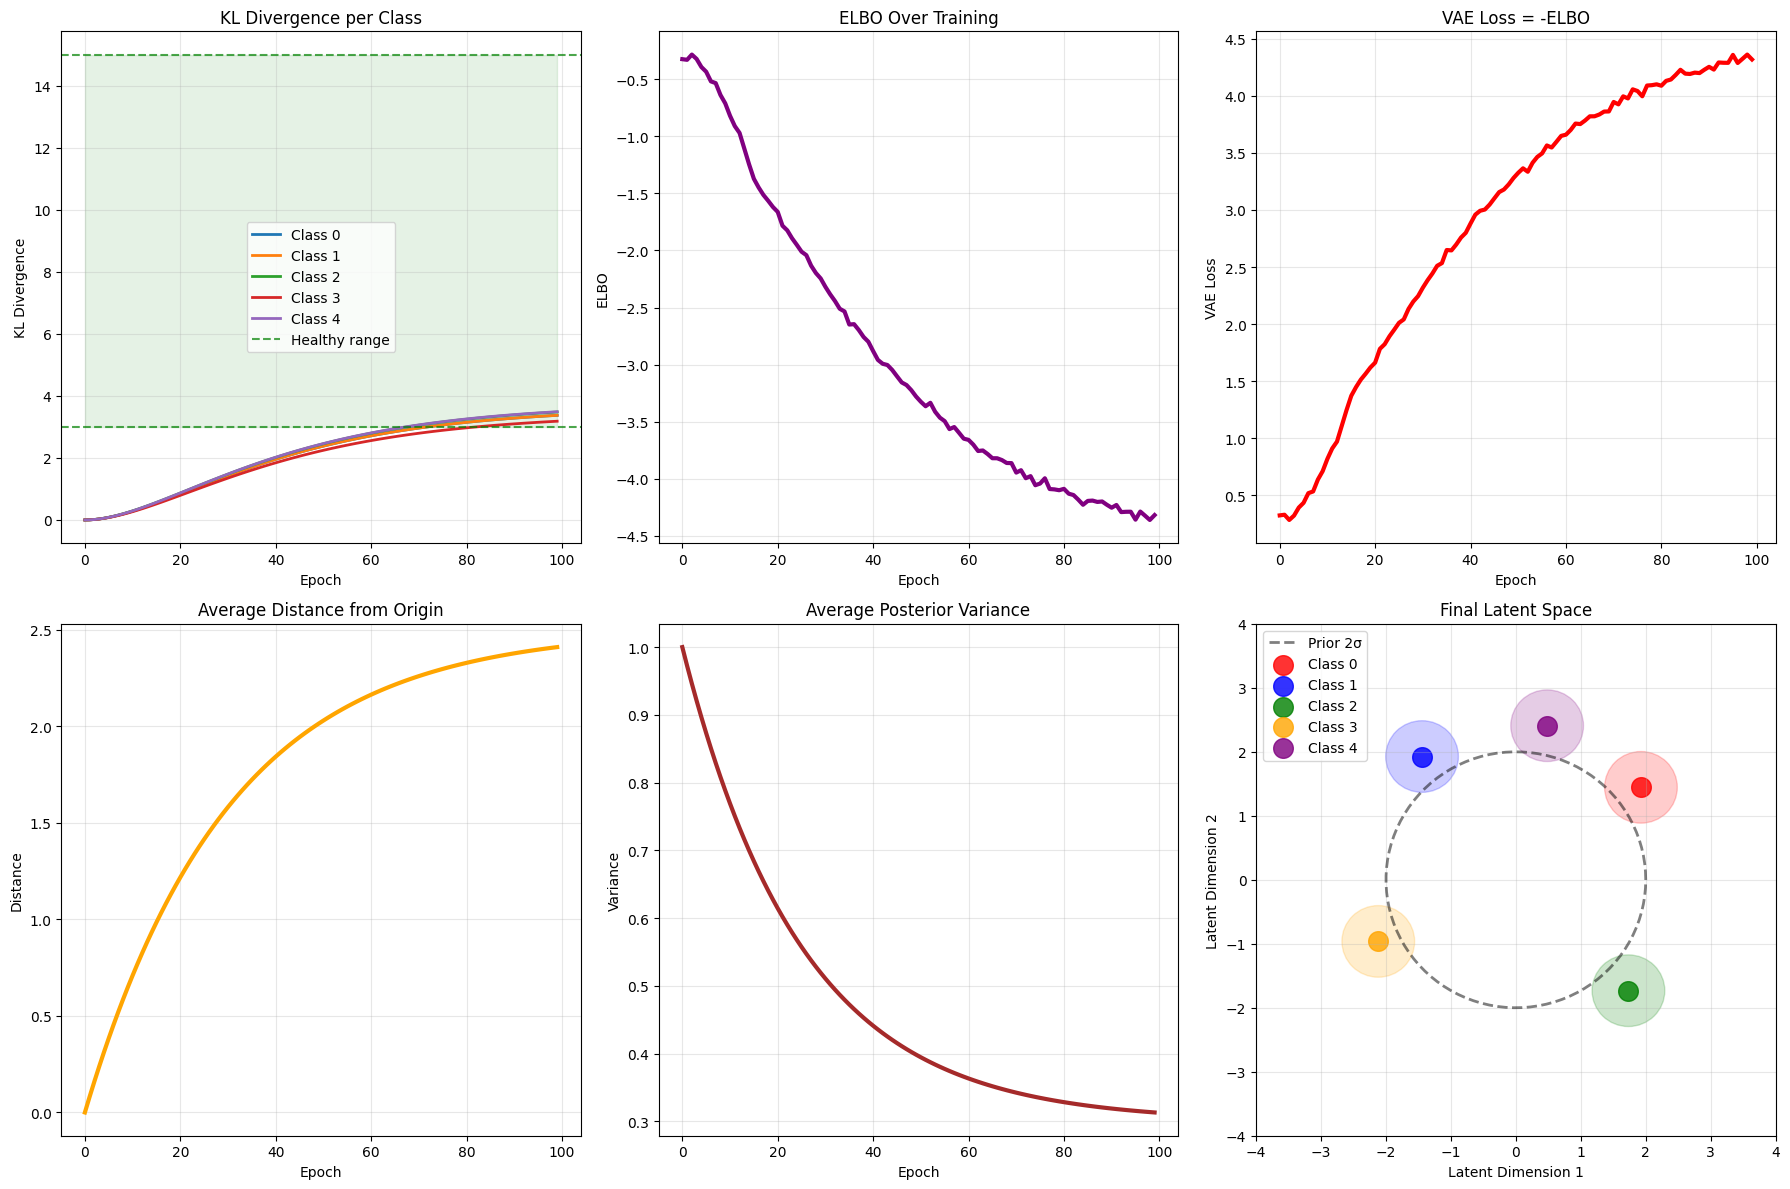


📊 학습 결과 요약:
초기 ELBO: -0.3230
최종 ELBO: -4.3195
ELBO 개선: -3.9966

초기 평균 KL: 0.0000
최종 평균 KL: 3.3790

최종 클래스별 KL:
  Class 0: 3.3725 ✅
  Class 1: 3.3725 ✅
  Class 2: 3.4792 ✅
  Class 3: 3.1824 ✅
  Class 4: 3.4885 ✅


In [9]:
def simulate_vae_training(n_epochs=100, n_classes=5, latent_dim=2):
    """VAE 학습 과정 시뮬레이션"""
    
    # 클래스별 최종 목표 위치 (잘 분리된 클러스터)
    target_positions = [
        [2.0, 1.5],   # Class 0
        [-1.5, 2.0],  # Class 1  
        [1.8, -1.8],  # Class 2
        [-2.2, -1.0], # Class 3
        [0.5, 2.5]    # Class 4
    ]
    
    # 학습 기록 저장
    history = {
        'epoch': [],
        'kl_losses': [],
        'reconstruction_losses': [],
        'elbo_values': [],
        'posterior_means': [],
        'posterior_vars': []
    }
    
    # 에포크별 시뮬레이션
    for epoch in range(n_epochs):
        # 학습 진행도 (0에서 1로)
        progress = 1 - np.exp(-epoch / 30)
        
        # 각 클래스별 사후분포 파라미터
        class_kl_losses = []
        class_recon_losses = []
        class_means = []
        class_vars = []
        
        for class_id in range(n_classes):
            # 사후분포 평균: 점진적으로 목표 위치로 이동
            target_mean = np.array(target_positions[class_id])
            current_mean = progress * target_mean
            class_means.append(current_mean)
            
            # 사후분포 분산: 점진적으로 감소 (더 확신있는 표현)
            base_var = 0.3 + 0.7 * np.exp(-epoch / 25)
            current_var = base_var
            class_vars.append(current_var)
            
            # KL divergence 계산 (vs N(0,I))
            kl = 0.5 * (latent_dim * current_var + np.sum(current_mean**2) - 
                       latent_dim - latent_dim * np.log(current_var))
            class_kl_losses.append(kl)
            
            # 재구성 손실 시뮬레이션
            # KL이 너무 작으면 재구성 품질 저하 (collapse)
            if kl < 0.5:
                recon_quality = 0.3 + 0.4 * (kl / 0.5)
            elif kl > 15:
                recon_quality = 0.9 - 0.2 * ((kl - 15) / 15)
            else:
                recon_quality = 0.7 + 0.3 * np.exp(-((kl - 5) / 5)**2)
            
            # 재구성 손실 (음수로 저장, 클수록 좋음)
            recon_loss = -(recon_quality + np.random.normal(0, 0.05))
            class_recon_losses.append(recon_loss)
        
        # 평균 계산
        avg_kl = np.mean(class_kl_losses)
        avg_recon = np.mean(class_recon_losses)
        elbo = avg_recon - avg_kl  # ELBO = 재구성 - KL
        
        # 기록 저장
        history['epoch'].append(epoch)
        history['kl_losses'].append(class_kl_losses)
        history['reconstruction_losses'].append(class_recon_losses)
        history['elbo_values'].append(elbo)
        history['posterior_means'].append(class_means.copy())
        history['posterior_vars'].append(class_vars.copy())
    
    return history

# 시뮬레이션 실행
print("🚀 VAE 학습 시뮬레이션 시작...")
training_history = simulate_vae_training()

# 결과 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. KL Divergence 변화
ax1 = axes[0, 0]
epochs = training_history['epoch']
kl_losses = np.array(training_history['kl_losses'])

for class_id in range(5):
    class_kls = kl_losses[:, class_id]
    ax1.plot(epochs, class_kls, label=f'Class {class_id}', linewidth=2)

ax1.axhline(y=3, color='green', linestyle='--', alpha=0.7, label='Healthy range')
ax1.axhline(y=15, color='green', linestyle='--', alpha=0.7)
ax1.fill_between(epochs, 3, 15, alpha=0.1, color='green')
ax1.set_title('KL Divergence per Class')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('KL Divergence')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. ELBO 변화
ax2 = axes[0, 1]
elbo_values = training_history['elbo_values']
ax2.plot(epochs, elbo_values, 'purple', linewidth=3)
ax2.set_title('ELBO Over Training')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('ELBO')
ax2.grid(True, alpha=0.3)

# 3. VAE Loss 변화
ax3 = axes[0, 2]
vae_losses = [-elbo for elbo in elbo_values]
ax3.plot(epochs, vae_losses, 'red', linewidth=3)
ax3.set_title('VAE Loss = -ELBO')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('VAE Loss')
ax3.grid(True, alpha=0.3)

# 4. 사후분포 평균 거리
ax4 = axes[1, 0]
mean_distances = []
for means in training_history['posterior_means']:
    distances = [np.linalg.norm(mean) for mean in means]
    mean_distances.append(np.mean(distances))

ax4.plot(epochs, mean_distances, 'orange', linewidth=3)
ax4.set_title('Average Distance from Origin')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Distance')
ax4.grid(True, alpha=0.3)

# 5. 사후분포 분산 변화
ax5 = axes[1, 1]
variances = training_history['posterior_vars']
avg_variances = [np.mean(var_list) for var_list in variances]
ax5.plot(epochs, avg_variances, 'brown', linewidth=3)
ax5.set_title('Average Posterior Variance')
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Variance')
ax5.grid(True, alpha=0.3)

# 6. 최종 잠재공간 시각화
ax6 = axes[1, 2]
final_means = training_history['posterior_means'][-1]
colors = ['red', 'blue', 'green', 'orange', 'purple']

# 사전분포 범위 표시
theta = np.linspace(0, 2*np.pi, 100)
circle_x = 2 * np.cos(theta)
circle_y = 2 * np.sin(theta)
ax6.plot(circle_x, circle_y, 'k--', alpha=0.5, linewidth=2, label='Prior 2σ')

# 각 클래스 위치 표시
for class_id, (mean, color) in enumerate(zip(final_means, colors)):
    ax6.scatter(mean[0], mean[1], c=color, s=200, 
               marker='o', label=f'Class {class_id}', alpha=0.8)
    
    # 분산 범위 표시 (타원)
    final_var = training_history['posterior_vars'][-1][class_id]
    circle = plt.Circle(mean, np.sqrt(final_var), 
                       color=color, alpha=0.2, fill=True)
    ax6.add_patch(circle)

ax6.set_title('Final Latent Space')
ax6.set_xlabel('Latent Dimension 1')
ax6.set_ylabel('Latent Dimension 2')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_xlim(-4, 4)
ax6.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

# 수치 결과 출력
print("\n📊 학습 결과 요약:")
print("=" * 50)
print(f"초기 ELBO: {elbo_values[0]:.4f}")
print(f"최종 ELBO: {elbo_values[-1]:.4f}")
print(f"ELBO 개선: {elbo_values[-1] - elbo_values[0]:.4f}")

print(f"\n초기 평균 KL: {np.mean(training_history['kl_losses'][0]):.4f}")
print(f"최종 평균 KL: {np.mean(training_history['kl_losses'][-1]):.4f}")

print(f"\n최종 클래스별 KL:")
for i, kl in enumerate(training_history['kl_losses'][-1]):
    status = "✅" if 3 <= kl <= 15 else "⚠️"
    print(f"  Class {i}: {kl:.4f} {status}")

문제 4: Jensen's Inequality 실험

다양한 오목함수에 대해 Jensen's Inequality를 확인하고, ELBO 유도에서의 역할을 설명하세요.

🔬 Jensen's Inequality 검증 실험
함수         형태       예상부등호        검증결과         위반율       
----------------------------------------------------------------------
log(x)     오목       f(E[X])≥E[f(X)] ✅ 성공         0.0%      
sqrt(x)    오목       f(E[X])≥E[f(X)] ✅ 성공         0.0%      
x^(1/3)    오목       f(E[X])≥E[f(X)] ✅ 성공         0.0%      
x^2        볼록       f(E[X])≤E[f(X)] ✅ 성공         0.0%      
exp(x)     볼록       f(E[X])≤E[f(X)] ✅ 성공         0.0%      


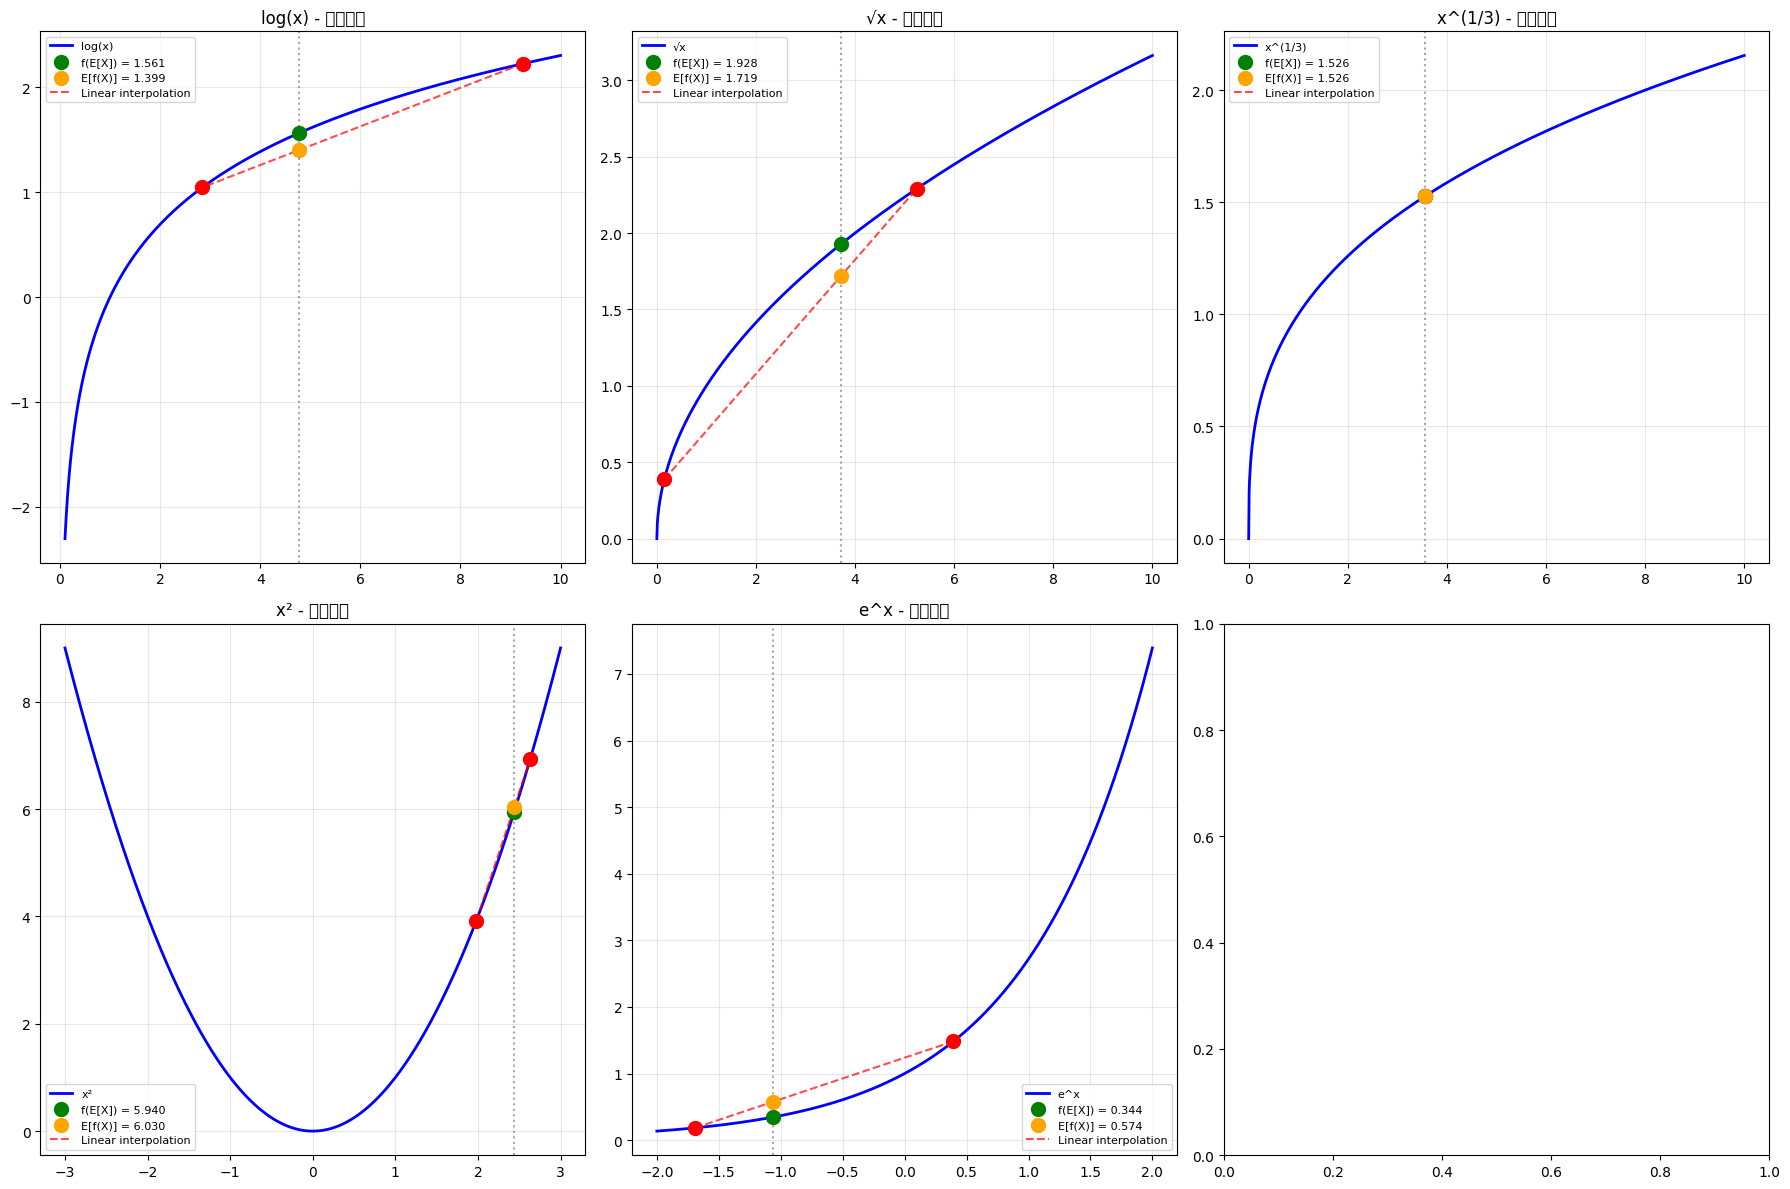


🎯 ELBO 유도에서 Jensen's Inequality의 역할:
1. 원래 문제:
   log p(x) = log ∫ p(x,z) dz  ← 직접 계산 불가능

2. 트릭 적용:
   = log ∫ q(z|x) × (p(x,z)/q(z|x)) dz
   = log E_q[p(x,z)/q(z|x)]

3. Jensen's Inequality 적용:
   log 함수는 오목함수이므로:
   log(E[Y]) ≥ E[log(Y)]

4. 우리 식에 적용:
   log E_q[p(x,z)/q(z|x)] ≥ E_q[log(p(x,z)/q(z|x))]
                           = ELBO

5. 결과:
   log p(x) ≥ ELBO
   ↓
   ELBO는 log p(x)의 하한(Lower Bound)!

💡 구체적 수치 예시:
log(E[p(x,z)/q(z|x)]) = 0.232936
E[log(p(x,z)/q(z|x))] = 0.115334
차이 = 0.117602
Jensen's Inequality: 0.232936 ≥ 0.115334 ? ✅

🎓 핵심 통찰:
Jensen's Inequality 덕분에:
✓ 계산 불가능한 log p(x)를 계산 가능한 ELBO로 우회
✓ ELBO 최대화 = log p(x) 간접 최대화
✓ VAE의 수학적 근거 제공
🔬 Jensen's Inequality 검증 실험
함수         형태       예상부등호        검증결과         위반율       
----------------------------------------------------------------------
log(x)     오목       f(E[X])≥E[f(X)] ✅ 성공         0.0%      
sqrt(x)    오목       f(E[X])≥E[f(X)] ✅ 성공         0.0%      
x^(1/3)    오목       f(E[X])≥E[f(X)] ✅ 성공         0.0%     

In [12]:
def verify_jensen_inequality():
    """Jensen's Inequality 검증 실험"""
    
    # 테스트할 함수들 정의
    functions = {
        'log(x)': {
            'func': lambda x: np.log(x),
            'domain': (0.1, 10),
            'concave': True,
            'name': 'log(x)'
        },
        'sqrt(x)': {
            'func': lambda x: np.sqrt(x),
            'domain': (0, 10),
            'concave': True,
            'name': '√x'
        },
        'x^(1/3)': {
            'func': lambda x: np.power(x, 1/3),
            'domain': (0, 10),
            'concave': True,
            'name': 'x^(1/3)'
        },
        'x^2': {
            'func': lambda x: x**2,
            'domain': (-3, 3),
            'concave': False,
            'name': 'x²'
        },
        'exp(x)': {
            'func': lambda x: np.exp(x),
            'domain': (-2, 2),
            'concave': False,
            'name': 'e^x'
        }
    }
    
    # 실험 설정
    np.random.seed(42)
    n_experiments = 1000
    
    print("🔬 Jensen's Inequality 검증 실험")
    print("=" * 70)
    print(f"{'함수':<10} {'형태':<8} {'예상부등호':<12} {'검증결과':<12} {'위반율':<10}")
    print("-" * 70)
    
    results = {}
    
    for func_name, func_info in functions.items():
        violations = 0
        differences = []
        
        for _ in range(n_experiments):
            # 랜덤 포인트 2개 생성
            a, b = func_info['domain']
            x1 = np.random.uniform(a, b)
            x2 = np.random.uniform(a, b)
            lambda_val = np.random.uniform(0, 1)
            
            # 가중 평균
            x_avg = lambda_val * x1 + (1 - lambda_val) * x2
            
            # Jensen's Inequality 체크
            f = func_info['func']
            
            try:
                f_of_avg = f(x_avg)  # f(E[X])
                avg_of_f = lambda_val * f(x1) + (1 - lambda_val) * f(x2)  # E[f(X)]
                
                if func_info['concave']:
                    # 오목함수: f(E[X]) >= E[f(X)]
                    expected_relation = '>='
                    if f_of_avg < avg_of_f - 1e-10:  # 수치 오차 고려
                        violations += 1
                else:
                    # 볼록함수: f(E[X]) <= E[f(X)]
                    expected_relation = '<='
                    if f_of_avg > avg_of_f + 1e-10:
                        violations += 1
                
                differences.append(f_of_avg - avg_of_f)
                
            except:
                violations += 1
        
        violation_rate = violations / n_experiments
        concave_str = "오목" if func_info['concave'] else "볼록"
        expected_str = "f(E[X])≥E[f(X)]" if func_info['concave'] else "f(E[X])≤E[f(X)]"
        status = "✅ 성공" if violation_rate < 0.01 else "❌ 실패"
        
        print(f"{func_name:<10} {concave_str:<8} {expected_str:<12} {status:<12} {violation_rate:<10.1%}")
        
        results[func_name] = {
            'violations': violation_rate,
            'differences': differences,
            'concave': func_info['concave']
        }
    
    return results
# functions를 전역으로 정의
functions = {
    'log(x)': {
        'func': lambda x: np.log(x),
        'domain': (0.1, 10),
        'concave': True,
        'name': 'log(x)'
    },
    'sqrt(x)': {
        'func': lambda x: np.sqrt(x),
        'domain': (0, 10),
        'concave': True,
        'name': '√x'
    },
    'x^(1/3)': {
        'func': lambda x: np.power(x, 1/3),
        'domain': (0, 10),
        'concave': True,
        'name': 'x^(1/3)'
    },
    'x^2': {
        'func': lambda x: x**2,
        'domain': (-3, 3),
        'concave': False,
        'name': 'x²'
    },
    'exp(x)': {
        'func': lambda x: np.exp(x),
        'domain': (-2, 2),
        'concave': False,
        'name': 'e^x'
    }
}
# Jensen's Inequality 검증 실행
jensen_results = verify_jensen_inequality()

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (func_name, func_info) in enumerate(functions.items()):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    
    # 함수 그래프
    a, b = func_info['domain']
    x = np.linspace(a, b, 1000)
    
    try:
        y = func_info['func'](x)
        ax.plot(x, y, 'b-', linewidth=2, label=func_info['name'])
        
        # Jensen's Inequality 예시
        x1, x2 = np.random.choice(x, 2)
        y1, y2 = func_info['func'](x1), func_info['func'](x2)
        lambda_val = 0.3
        
        x_avg = lambda_val * x1 + (1 - lambda_val) * x2
        y_avg_func = func_info['func'](x_avg)
        y_avg_direct = lambda_val * y1 + (1 - lambda_val) * y2
        
        # 점들 표시
        ax.scatter([x1, x2], [y1, y2], color='red', s=100, zorder=5)
        ax.scatter(x_avg, y_avg_func, color='green', s=100, 
                  label=f'f(E[X]) = {y_avg_func:.3f}', zorder=5)
        ax.scatter(x_avg, y_avg_direct, color='orange', s=100, 
                  label=f'E[f(X)] = {y_avg_direct:.3f}', zorder=5)
        
        # 선분 그리기
        ax.plot([x1, x2], [y1, y2], 'r--', alpha=0.7, label='Linear interpolation')
        ax.axvline(x=x_avg, color='gray', linestyle=':', alpha=0.7)
        
        ax.set_title(f"{func_info['name']} - {'오목함수' if func_info['concave'] else '볼록함수'}")
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

print("\n🎯 ELBO 유도에서 Jensen's Inequality의 역할:")
print("=" * 60)

def explain_jensen_in_elbo():
    """ELBO 유도에서 Jensen's Inequality 설명"""
    
    print("1. 원래 문제:")
    print("   log p(x) = log ∫ p(x,z) dz  ← 직접 계산 불가능")
    
    print("\n2. 트릭 적용:")
    print("   = log ∫ q(z|x) × (p(x,z)/q(z|x)) dz")
    print("   = log E_q[p(x,z)/q(z|x)]")
    
    print("\n3. Jensen's Inequality 적용:")
    print("   log 함수는 오목함수이므로:")
    print("   log(E[Y]) ≥ E[log(Y)]")
    
    print("\n4. 우리 식에 적용:")
    print("   log E_q[p(x,z)/q(z|x)] ≥ E_q[log(p(x,z)/q(z|x))]")
    print("                           = ELBO")
    
    print("\n5. 결과:")
    print("   log p(x) ≥ ELBO")
    print("   ↓")
    print("   ELBO는 log p(x)의 하한(Lower Bound)!")

explain_jensen_in_elbo()

# Jensen's Inequality를 VAE에 적용한 구체적 예시
print("\n💡 구체적 수치 예시:")
print("=" * 40)

# 가상의 VAE 예시
np.random.seed(42)
z_samples = np.random.normal(0, 1, 1000)  # 잠재변수 샘플들
p_x_given_z = np.exp(-0.5 * z_samples**2)  # p(x|z) 값들 (가상)
q_z_given_x = np.exp(-0.5 * (z_samples - 0.5)**2)  # q(z|x) 값들 (가상)

# 비율 계산
ratios = p_x_given_z / q_z_given_x

# Jensen's Inequality 적용
log_of_mean = np.log(np.mean(ratios))  # log(E[Y])
mean_of_log = np.mean(np.log(ratios))  # E[log(Y)]

print(f"log(E[p(x,z)/q(z|x)]) = {log_of_mean:.6f}")
print(f"E[log(p(x,z)/q(z|x))] = {mean_of_log:.6f}")
print(f"차이 = {log_of_mean - mean_of_log:.6f}")
print(f"Jensen's Inequality: {log_of_mean:.6f} ≥ {mean_of_log:.6f} ? {'✅' if log_of_mean >= mean_of_log else '❌'}")

print("\n🎓 핵심 통찰:")
print("Jensen's Inequality 덕분에:")
print("✓ 계산 불가능한 log p(x)를 계산 가능한 ELBO로 우회")
print("✓ ELBO 최대화 = log p(x) 간접 최대화")
print("✓ VAE의 수학적 근거 제공")

# 실행
jensen_verification_results = verify_jensen_inequality()